# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [9]:
# Importação dos pacotes necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Carregando a base de dados
tips = sns.load_dataset("tips").copy()

# Criando variável com a conta líquida (sem gorjeta)
tips["net_bill"] = tips["total_bill"] - tips["tip"]

# Visualizando as primeiras linhas
tips[["total_bill", "tip", "net_bill"]].head()


,total_bill,tip,net_bill
0,16.99,1.01,15.98
1,10.34,1.66,8.68
2,21.01,3.50,17.51
3,23.68,3.31,20.37
4,24.59,3.61,20.98


In [10]:
# Regressão linear simples: tip em função de net_bill
reg = smf.ols("tip ~ net_bill", data=tips).fit()

# Sumário do modelo
print(reg.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 12 May 2025   Prob (F-statistic):           5.02e-23
Time:                        19:45:45   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

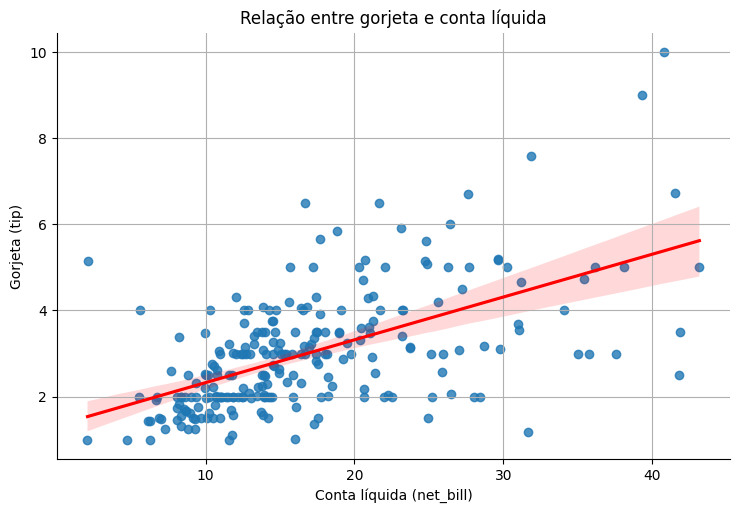

In [11]:
# Gráfico de dispersão com linha de regressão
sns.lmplot(data=tips, x="net_bill", y="tip", line_kws={"color": "red"}, height=5, aspect=1.5)
plt.title("Relação entre gorjeta e conta líquida")
plt.xlabel("Conta líquida (net_bill)")
plt.ylabel("Gorjeta (tip)")
plt.grid(True)
plt.show()


### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [12]:
reg1 = smf.ols("tip ~ net_bill", data=tips).fit()
print(reg1.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 12 May 2025   Prob (F-statistic):           5.02e-23
Time:                        19:45:46   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

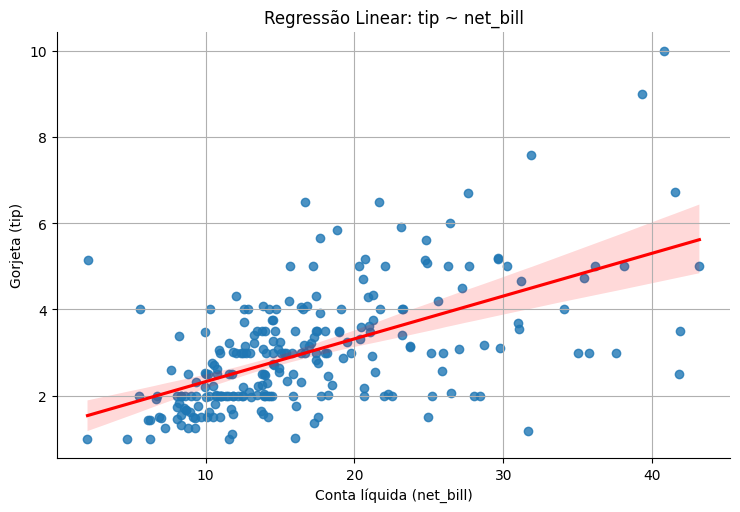

In [13]:
sns.lmplot(data=tips, x="net_bill", y="tip", line_kws={"color": "red"}, height=5, aspect=1.5)
plt.title("Regressão Linear: tip ~ net_bill")
plt.xlabel("Conta líquida (net_bill)")
plt.ylabel("Gorjeta (tip)")
plt.grid(True)
plt.show()


### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [14]:
# Criando a variável tip_pct (percentual da gorjeta sobre o total da conta)
tips["tip_pct"] = tips["tip"] / tips["total_bill"]

# Ajustando a regressão tip_pct ~ net_bill
reg2 = smf.ols("tip_pct ~ net_bill", data=tips).fit()

# Exibindo o resumo da regressão
print(reg2.summary())


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     56.25
Date:                Mon, 12 May 2025   Prob (F-statistic):           1.21e-12
Time:                        19:45:46   Log-Likelihood:                 361.93
No. Observations:                 244   AIC:                            -719.9
Df Residuals:                     242   BIC:                            -712.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2162      0.008     26.401      0.0

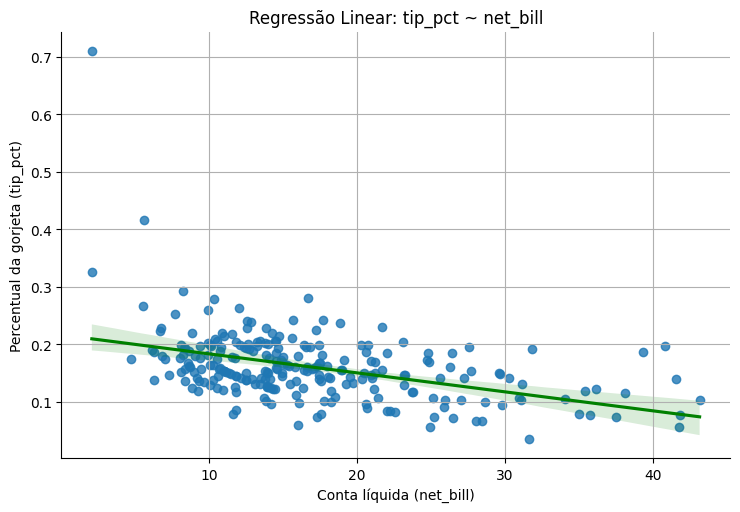

In [15]:
sns.lmplot(data=tips, x="net_bill", y="tip_pct", line_kws={"color": "green"}, height=5, aspect=1.5)
plt.title("Regressão Linear: tip_pct ~ net_bill")
plt.xlabel("Conta líquida (net_bill)")
plt.ylabel("Percentual da gorjeta (tip_pct)")
plt.grid(True)
plt.show()


### Comparação entre os Modelos

- A regressão `tip ~ net_bill` mostra uma relação direta entre o valor absoluto da gorjeta e a conta líquida.
- A regressão `tip_pct ~ net_bill` analisa a proporção da gorjeta em relação à conta líquida.

Embora ambos usem a mesma variável explicativa, o comportamento é diferente. O R² não pode ser diretamente comparado entre os dois modelos, pois os alvos (`tip` e `tip_pct`) estão em escalas distintas. Cada modelo responde a uma pergunta diferente.


In [16]:
# Obtendo valores preditos
tips["pred_tip_pct"] = reg2.fittedvalues
tips["pred_tip"] = tips["pred_tip_pct"] * tips["net_bill"]

# R² do modelo escalado para tip
r2_final = r2_score(tips["tip"], tips["pred_tip"])
print(f"R² do modelo escalado para 'tip' a partir de tip_pct: {r2_final:.4f}")
print(f"R² original do modelo tip ~ net_bill: {reg1.rsquared:.4f}")


R² do modelo escalado para 'tip' a partir de tip_pct: 0.1509
R² original do modelo tip ~ net_bill: 0.3325
